<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDG042521V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.7/dist-packages (0.11.0)


In [64]:
# from google.colab import drive
import pathlib
import pandas as pd
import numpy as np
from pylab import *

from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

from plotnine import *
import plotnine

In [3]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [4]:
if str(pathlib.Path().absolute()).find('content') >= 0:
    sourcepath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed'
else:
    sourcepath = '../Datos/Transformed'
print(sourcepath)    

https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed


In [5]:
# Dataset de inventarios sin dimensiones de los productos
df = pd.read_csv("{}/dfNoDims.csv".format(sourcepath))
df.drop('CONTRPERC', inplace=True, axis=1)
df['AISLE']=df['AISLE'].astype(str)

In [6]:
data1 = df

In [7]:
data1.dtypes

AISLE        object
IG           object
HTS          object
PLANNING     object
ABC          object
UOM          object
CAT          object
COSTX       float64
QTYVAR      float64
dtype: object

In [8]:
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00


In [9]:
numdf = data1[list(data1.select_dtypes('float64').columns)]
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
4,-0.077628,-0.046455
...,...,...
16239,0.098319,-0.033191
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812


In [10]:
catdf = data1[list(data1.select_dtypes('object').columns)]

In [11]:
data1 = pd.concat((catdf, scaled_features_df), axis = 1)
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812


In [12]:
catColumnsPos = [data1.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

In [13]:
# Fit the cluster 
# k = 4
# gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', gamma = 0.5, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 65.375492811203 seconds ---


In [14]:
print(kprototype.cluster_centroids_)

[['0.002726388751717142' '-0.03595785577407407' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']
 ['-3.6487292748298596' '-0.11901373330295542' '37' 'IG64' 'HTS15' '1/1'
  'A' 'BX' 'CAT14']
 ['1.784357513065899' '36.717082988705094' '2' 'IG38' 'HTS61' '1/1' 'A'
  'SQFT' 'CAT8']
 ['2.79799290946075' '0.50533898239745' '37' 'IG64' 'HTS15' '1/1' 'A'
  'BX' 'CAT14']]


In [15]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

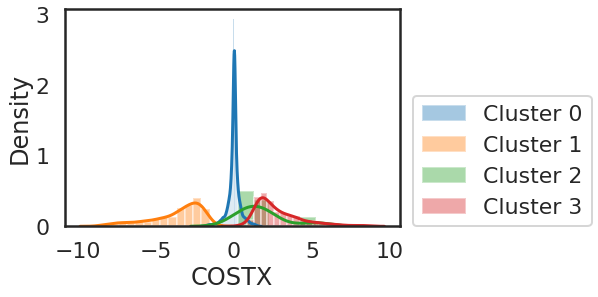

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

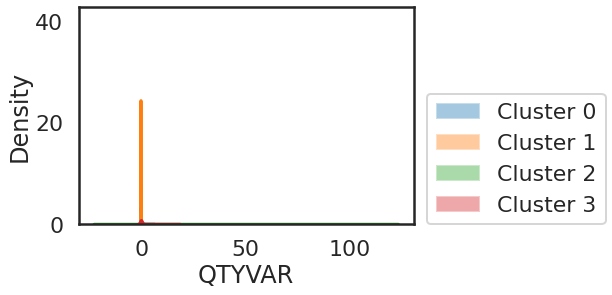

In [16]:
import matplotlib.pylab as plt
for var in ['COSTX','QTYVAR']:
    for i in range(4):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    plt.show();
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


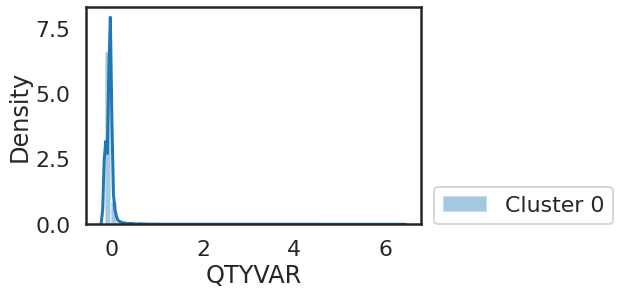

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


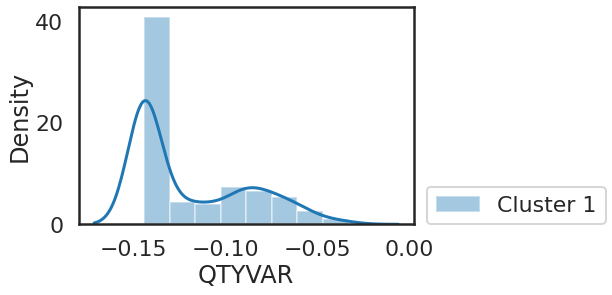

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


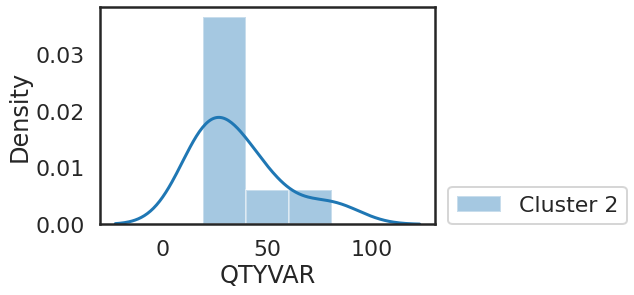

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


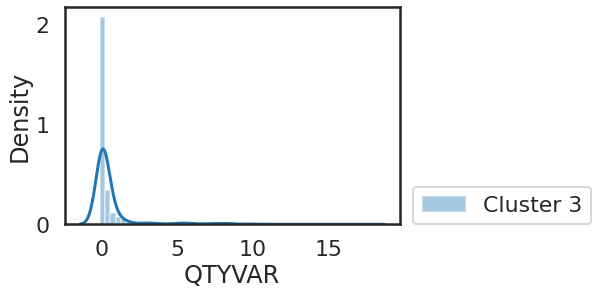

In [17]:
for i in range(4):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [18]:
# Dataset original sin estandarizar
df['Cluster'] = kprototype.labels_
for i in range(4):
  print('Cluster',i,'\n');
  print(df[df['Cluster']==i].describe());
  print('\n');

Cluster 0 

              COSTX        QTYVAR  Cluster
count  15143.000000  15143.000000  15143.0
mean    -136.421064     -1.526253      0.0
std     1873.523084    180.069958      0.0
min    -9305.111300   -100.000000      0.0
25%     -665.914650    -50.000000      0.0
50%      -39.719500     -1.410000      0.0
75%      481.841900      3.865000      0.0
max     7351.477700   5833.330000      0.0


Cluster 1 

              COSTX      QTYVAR  Cluster
count    483.000000  483.000000    483.0
mean  -17432.685013  -77.358696      1.0
std     7815.433001   28.603587      0.0
min   -40013.935000 -100.000000      1.0
25%   -21429.082100 -100.000000      1.0
50%   -14976.377400 -100.000000      1.0
75%   -11373.943900  -50.095000      1.0
max    -7519.609900    1.000000      1.0


Cluster 2 

              COSTX        QTYVAR  Cluster
count      8.000000      8.000000      8.0
mean    8302.833038  33555.073750      2.0
std     7294.693408  19465.108337      0.0
min     1151.114100  17900.00000

# **Análisis columnas numéricas**
***Cluster 0***
*   Grueso del dataset (15K+)
*   **COSTX** positivo y negativo, pero **no en los extremos**
*   **QTYVAR** todo rango, incluso muy grandes pero no verdaderos outliers positivos

***Cluster 1***
*   Subset (cerca de 500 transacciones)
*   **COSTX** **extremo negativo**
*   **QTYVAR** variaciones **negativas**

***Cluster 2***
*   Muy pequeño (8 transacciones), outliers?
*   **COSTX** **positivos** medianos y grandes
*   **QTYVAR** **extremo positivos**

***Cluster 3***
*   Subset (un poco más de 600 transacciones)
*   **COSTX** **extremo positivo**
*   **QTYVAR** **poistivos** medianos y grandes



**Conclusiones preliminares basadas en las columnas numéricas **
*   Priorizar Cluster # 1
*   Revisar Cluster # 2? Outliers? Ignorar o prestar especial atención?
*   Segundo nivel de prioridad Cluster # 2?
*   Ignorar Cluster # 0 (bulk)





In [41]:
# Detalle cluster # 2 (8 observaciones)
df[df['Cluster']==2]
# Llaman particular atención las 4 transacciones de CAT8 (valores categóricos idénticos)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,Cluster
2436,16,IG49,HTS119,1/1,C,PC,CAT16,4778.1360,20800.00,2
3251,2,IG38,HTS61,1/1,A,SQFT,CAT8,3372.8061,19100.00,2
5181,2,IG38,HTS61,1/1,A,SQFT,CAT8,8974.8515,19570.59,2
5194,2,IG38,HTS61,1/1,A,SQFT,CAT8,9931.1640,34920.00,2
5198,2,IG38,HTS61,1/1,A,SQFT,CAT8,4704.7548,73950.00,2
5528,4,IG30,HTS46,1/1,A,YD,CAT12,8827.5178,34300.00,2
9105,41,IG26,HTS56,1/1,A,BX,CAT7,24682.3200,17900.00,2
10516,23,IG55,HTS95,1/1,C,FT,CAT16,1151.1141,47900.00,2


In [46]:
# Revisar AISLE=2 + IG=IG38 + HTS=HTS61 + PLANNING=1/1 + ABC=A + UOM=SQFT + CAT=CAT8
# 268 transacciones
df[(df['AISLE']=='2') & (df['IG']=='IG38') & (df['HTS']=='HTS61') & (df['PLANNING']=='1/1') & (df['ABC']=='A') & (df['UOM']=='SQFT') & (df['CAT']=='CAT8')].describe()
# 289 sin AISLE
# Cluster descartado despues de revisar los datos - son rollos de los cuales quedaban muy pequeñas fracciones de material en la ubicacion de bodega, el incremento hubiera sido 100 en lugar de miles en caso de ser cero (muy probablemente diferencia de redondeo)

,COSTX,QTYVAR,Cluster
count,268.000000,268.000000,268.000000
mean,45.096143,573.975224,0.033582
std,1920.211315,5261.556475,0.250077
min,-14976.377400,-100.000000,0.000000
25%,-604.605500,-100.000000,0.000000
50%,-32.324250,-4.010000,0.000000
75%,683.165050,8.022500,0.000000
max,9931.164000,73950.000000,2.000000


In [47]:
# CAT en clusters 1 y 3
contingency = pd.crosstab(data1[(data1['Cluster']==1) | (data1['Cluster']==3)].Cluster, data1['CAT']) 
contingency

CAT,CAT1,CAT10,CAT12,CAT14,CAT15,CAT16,CAT17,CAT2,CAT3,CAT4,CAT5,CAT7,CAT8,CAT9
Cluster,,,,,,,,,,,,,,
1,6,6,99,185,1,38,31,2,17,6,12,26,54,0
3,6,10,139,225,0,53,62,3,23,4,12,29,43,1


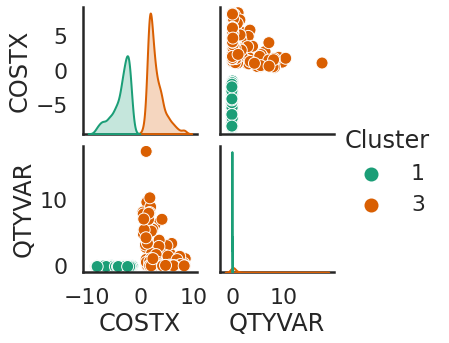

In [48]:
sns.pairplot(data1[(data1['Cluster']==1) | (data1['Cluster']==3)],hue='Cluster',palette='Dark2',diag_kind='kde')

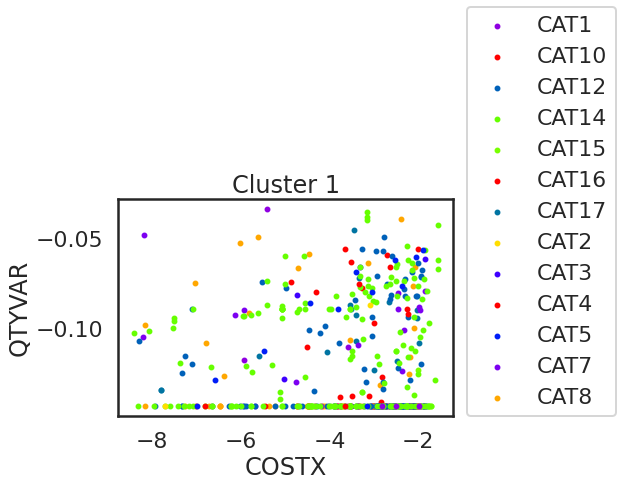

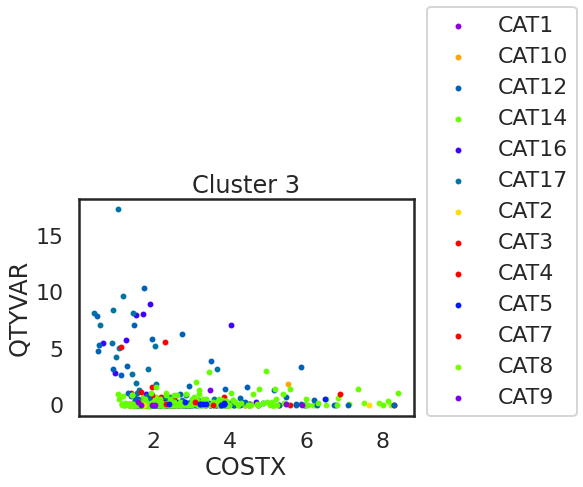

In [65]:
for cluster in [1,3]:
  ax=gca()
  plttitle = 'Cluster ' + str(cluster)
  uniq = list(set(data1[data1['Cluster']==cluster].CAT))
  # Color map
  z = range(1,len(uniq))
  colorMap = plt.get_cmap('prism')
  cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
  # Plot CAT
  for i in range(len(uniq)):
    plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
  plt.xlabel('COSTX')
  plt.ylabel('QTYVAR')
  plt.title(plttitle)
  handles, labels = ax.get_legend_handles_labels()
  # sort both labels and handles by labels
  labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
  ax.legend(handles, labels,loc=(1.04,0))
  plt.show()

In [97]:
pd.set_option('display.max_columns', None)
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].CAT) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1 

CAT      CAT1  CAT10  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  CAT4  \
Cluster                                                                     
1           6      6     99    185      1     38     31     2    17     6   

CAT      CAT5  CAT7  CAT8  
Cluster                    
1          12    26    54   

Cluster  3 

CAT      CAT1  CAT10  CAT12  CAT14  CAT16  CAT17  CAT2  CAT3  CAT4  CAT5  \
Cluster                                                                    
3           6     10    139    225     53     62     3    23     4    12   

CAT      CAT7  CAT8  CAT9  
Cluster                    
3          29    43     1   



**Son las mismas categorías, con la única excepción de CAT15 en cluster 1 (solo 1 fila) y CAT9 en cluster 3 (solo 1 fila)**

Particular atención a CAT12 y CAT14 en ambos clusters

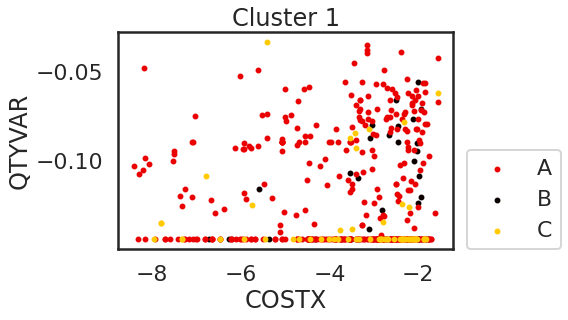

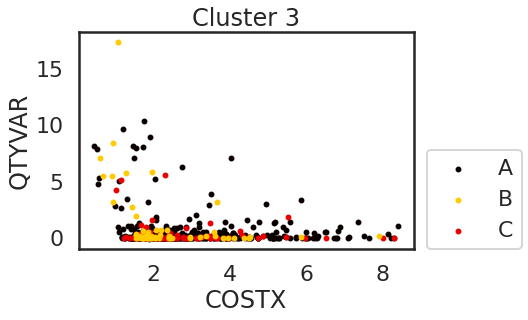

In [69]:
for cluster in [1,3]:
  ax=gca()
  plttitle = 'Cluster ' + str(cluster)
  uniq = list(set(data1[data1['Cluster']==cluster].ABC))
  # Color map
  z = range(1,len(uniq))
  colorMap = plt.get_cmap('hot')
  cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
  # Plot CAT
  for i in range(len(uniq)):
    plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['ABC']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['ABC']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
  plt.xlabel('COSTX')
  plt.ylabel('QTYVAR')
  plt.title(plttitle)
  handles, labels = ax.get_legend_handles_labels()
  # sort both labels and handles by labels
  labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
  ax.legend(handles, labels,loc=(1.04,0))
  plt.show()

In [96]:
pd.set_option('display.max_columns', None)
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].ABC) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1 

ABC        A   B   C
Cluster             
1        369  51  63 

Cluster  3 

ABC        A   B   C
Cluster             
3        470  60  80 



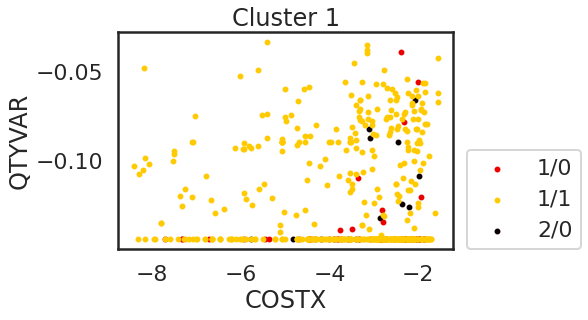

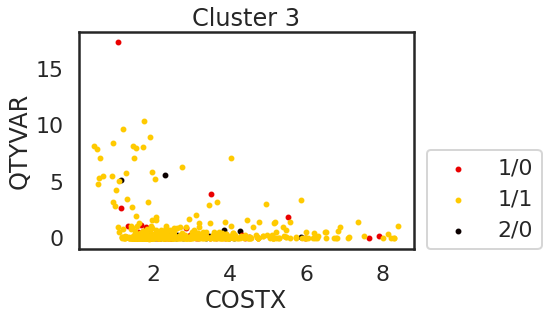

In [79]:
for cluster in [1,3]:
  ax=gca()
  plttitle = 'Cluster ' + str(cluster)
  uniq = list(set(data1[data1['Cluster']==cluster].PLANNING))
  # Color map
  z = range(1,len(uniq))
  colorMap = plt.get_cmap('hot')
  cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
  # Plot CAT
  for i in range(len(uniq)):
    plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['PLANNING']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['PLANNING']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
  plt.xlabel('COSTX')
  plt.ylabel('QTYVAR')
  plt.title(plttitle)
  handles, labels = ax.get_legend_handles_labels()
  # sort both labels and handles by labels
  labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
  ax.legend(handles, labels,loc=(1.04,0))
  plt.show()

In [95]:
# Columnas categóricas
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n');  
  print(data1[data1['Cluster']==i].describe(include='object'));
  print('\n');

Cluster  1 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    483   483    483      483  483  483    483
unique    42    47     49        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      73    88    125      415  369  331    185


Cluster  3 

       AISLE    IG    HTS PLANNING  ABC  UOM    CAT
count    610   610    610      610  610  610    610
unique    41    49     46        3    3   12     13
top       37  IG64  HTS15      1/1    A   BX  CAT14
freq      72   104    146      529  470  382    225




In [ ]:
# Particularmente interesante:
# Cluster 1
# top       37  IG64  HTS15      1/1    A   BX  CAT14
# Cluster 3
# top       37  IG64  HTS15      1/1    A   BX  CAT14

**Regla del negocio: simpre priorizar ABC=A + PLANNING=1/1**

In [92]:
pd.set_option('display.max_columns', None)
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].HTS) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1 

HTS      HTS117  HTS119  HTS120  HTS132  HTS15  HTS150  HTS155  HTS16  HTS161  \
Cluster                                                                         
1             7      52       1       2    125       4       1      1       2   

HTS      HTS166  HTS167  HTS17  HTS170  HTS19  HTS23  HTS24  HTS36  HTS37  \
Cluster                                                                     
1             2       2      1       1      1      6     11      4      2   

HTS      HTS40  HTS41  HTS43  HTS45  HTS46  HTS48  HTS50  HTS51  HTS52  HTS53  \
Cluster                                                                         
1            6      3      2      1      5     16      1      9      1      2   

HTS      HTS55  HTS56  HTS57  HTS58  HTS59  HTS6  HTS61  HTS65  HTS66  HTS67  \
Cluster                                                                        
1           20      6      3      2      2    86      7      2      6      5   

HTS      HTS69  HTS73  HTS

In [91]:
pd.set_option('display.max_columns', None)
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].IG) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1 

IG       IG10  IG11  IG12  IG13  IG14  IG16  IG17  IG18  IG19  IG2  IG22  \
Cluster                                                                    
1           6    12     2     7    17    20    17     1     1    5    19   

IG       IG26  IG27  IG29  IG3  IG30  IG31  IG33  IG34  IG35  IG38  IG39  \
Cluster                                                                    
1           6     1     5    1    22    22     4     5    11     2     1   

IG       IG42  IG43  IG44  IG45  IG46  IG47  IG48  IG51  IG52  IG53  IG54  \
Cluster                                                                     
1           2     1     2    10    12     3     2     8    10     6     6   

IG       IG55  IG56  IG57  IG58  IG6  IG61  IG62  IG63  IG64  IG67  IG69  IG7  \
Cluster                                                                         
1           6     3     1     2    3    74     1     3    88    10     3   28   

IG       IG70  IG8  
Cluster             
1          

In [93]:
pd.set_option('display.max_columns', None)
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].AISLE) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1 

AISLE    0  1  10  11  12  13  14  15  16  17  18  19   2  20  21  22  23  24  \
Cluster                                                                         
1        3  8  12  35   3   5   5   8   7   8   2   3  21   2   8  11   4   9   

AISLE    25  26  27  28  29   3  30  31  32  33  34  35  37  38  39   4  40  \
Cluster                                                                       
1        12   8   9   9   8  14   7  11  34   8   6   2  73   3   5  27   4   

AISLE    41  5   6   7   8   9  99  
Cluster                             
1         2  7  15  16  18  17  14   

Cluster  3 

AISLE    0  1  10  11  12  13  14  15  16  17  18  19   2  20  21  22  23  24  \
Cluster                                                                         
3        4  6  17  53  11  13  11   8  14  10   8  10  20   6   7   7   4   6   

AISLE    25  26  27  28  29   3  30  31  32  33  34  35  37  38   4  40  41  \
Cluster                                                 

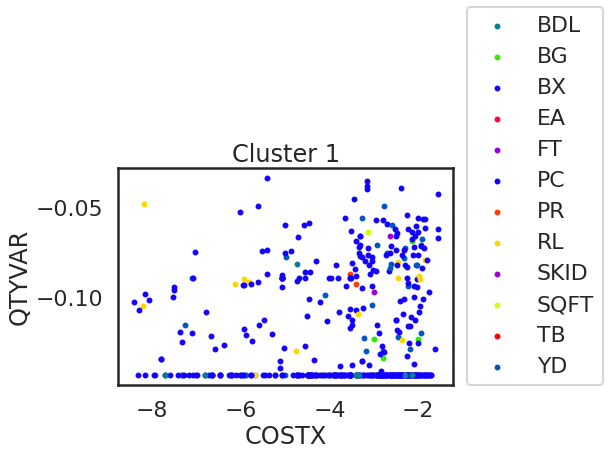

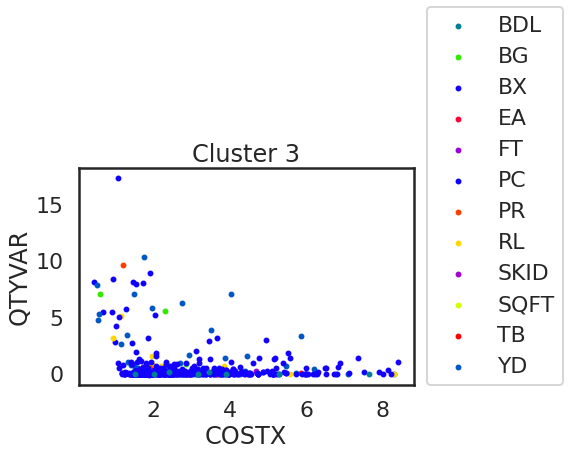

In [99]:
for cluster in [1,3]:
  ax=gca()
  plttitle = 'Cluster ' + str(cluster)
  uniq = list(set(data1[data1['Cluster']==cluster].UOM))
  # Color map
  z = range(1,len(uniq))
  colorMap = plt.get_cmap('prism')
  cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
  # Plot CAT
  for i in range(len(uniq)):
    plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['UOM']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['UOM']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
  plt.xlabel('COSTX')
  plt.ylabel('QTYVAR')
  plt.title(plttitle)
  handles, labels = ax.get_legend_handles_labels()
  # sort both labels and handles by labels
  labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
  ax.legend(handles, labels,loc=(1.04,0))
  plt.show()

In [100]:
pd.set_option('display.max_columns', None)
for i in [1,3]:
  print('\033[1m' + '\033[91m' + 'Cluster ',i, '\033[0m' + '\n')
  contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].UOM) 
  print(contingency,'\n')
pd.options.display.max_columns = 10

Cluster  1 

UOM      BDL  BG   BX  EA  FT  PC  PR  RL  SKID  SQFT  TB  YD
Cluster                                                      
1          7   8  331   2   9  36   4  22     1     2   1  60 

Cluster  3 

UOM      BDL  BG   BX  EA  FT  PC  PR  RL  SKID  SQFT  TB   YD
Cluster                                                       
3          8   9  382   2   8  63   9  22     1     2   2  102 



* 11,521 SKU's
*  2,071 -> CAT12 & CAT14
*    **550 SKU's** -> ABC=A & PLANNING=1/1
* **Menos del 5% de los SKU's (4.7%)**
* Cerca de 1,600 productos A, Por lo que 550 corresponde al 34.75% (poco más de una tercera parte)
* Si se incluyen 10 de estos SKU's en los conteos cíclicos diarios, se estarían contando 5 x 22 x 10 = 1,100 al mes = 550 x 2. Esto equivale a contar cada uno de esos products dos veces al mes, lo cual es una frecuencia superior al estándar corporativo de 1 vez al mes para productos A. La frecuencia de dos veces al mes sería el resultado de la priorización objeto de este proyecto.
* Si nos enfocamos en las cajas (**BX**) tanto por su frecuencia, como por su importancia y costo, estaríamos priorizando **320 SKU's**.
* **Menos del 3% de los SKU's (2.8%)**
* 20% del total de los productos A.
* Solo sería necesario contar 6 de estos SKU's en los conteos cíclicos diarios, 5 x 22 x 6 = 660 al mes = 320 x 2 + sobrante, para contar cada uno de esos products dos veces al mes como estrategia de priorización.